In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка Fashion-MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Нормализация данных (приведение к диапазону [0, 1])
x_train = x_train / 255.0
x_test = x_test / 255.0

# Добавление размерности для каналов (Fashion-MNIST — чёрно-белые изображения)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Преобразование меток в one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Классы Fashion-MNIST
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


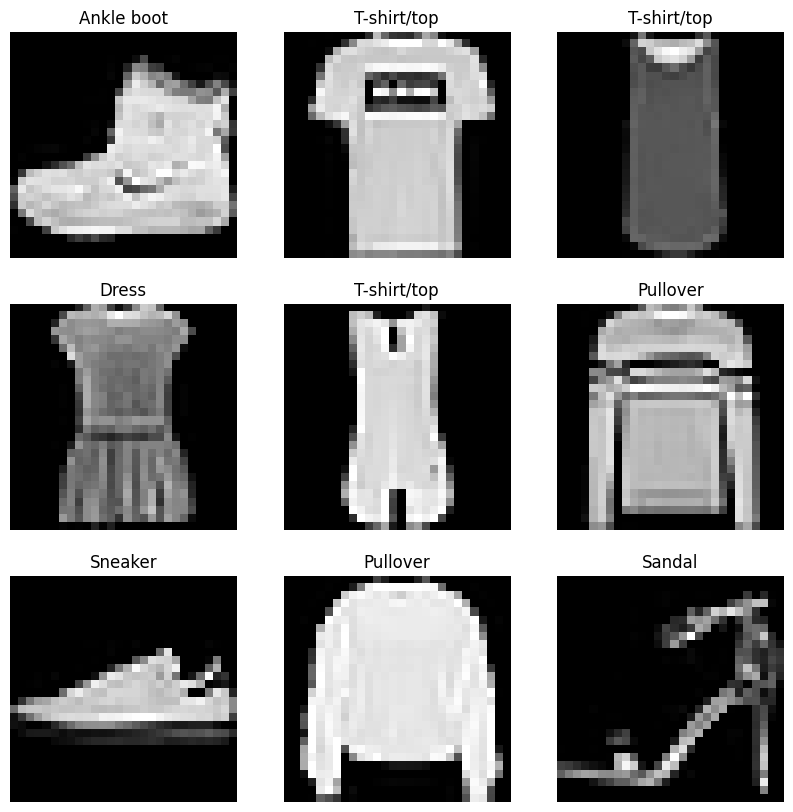

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i].squeeze(), cmap="gray")
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis("off")
plt.show()

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")  # 10 классов
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=10,
    batch_size=64
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 58ms/step - accuracy: 0.6963 - loss: 0.8456 - val_accuracy: 0.8409 - val_loss: 0.4158
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 61ms/step - accuracy: 0.8529 - loss: 0.4101 - val_accuracy: 0.8781 - val_loss: 0.3361
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.8722 - loss: 0.3583 - val_accuracy: 0.8888 - val_loss: 0.3081
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 56ms/step - accuracy: 0.8837 - loss: 0.3216 - val_accuracy: 0.8970 - val_loss: 0.2805
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 58ms/step - accuracy: 0.8959 - loss: 0.2884 - val_accuracy: 0.9012 - val_loss: 0.2838
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 55ms/step - accuracy: 0.9007 - loss: 0.2696 - val_accuracy: 0.9020 - val_loss: 0.2680
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 56ms/step - accuracy: 0.9079 - loss: 0.2517 - val_accuracy: 0.9060 - val_loss: 0.2535
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 56ms/step - accuracy: 0.9120 - loss: 0.2402 - 

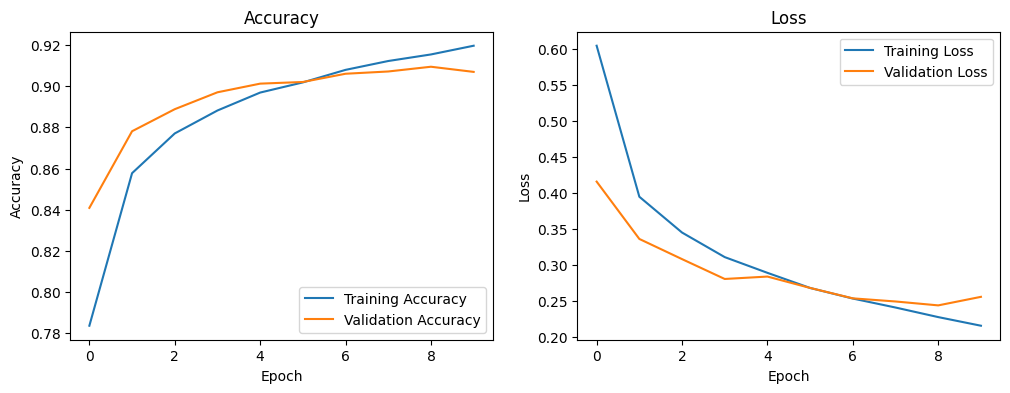

In [ ]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # График точности
    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Training Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    # График потерь
    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

plot_training_history(history)

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9051 - loss: 0.2676
Test Accuracy: 90.69%
Test Loss: 0.2556


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


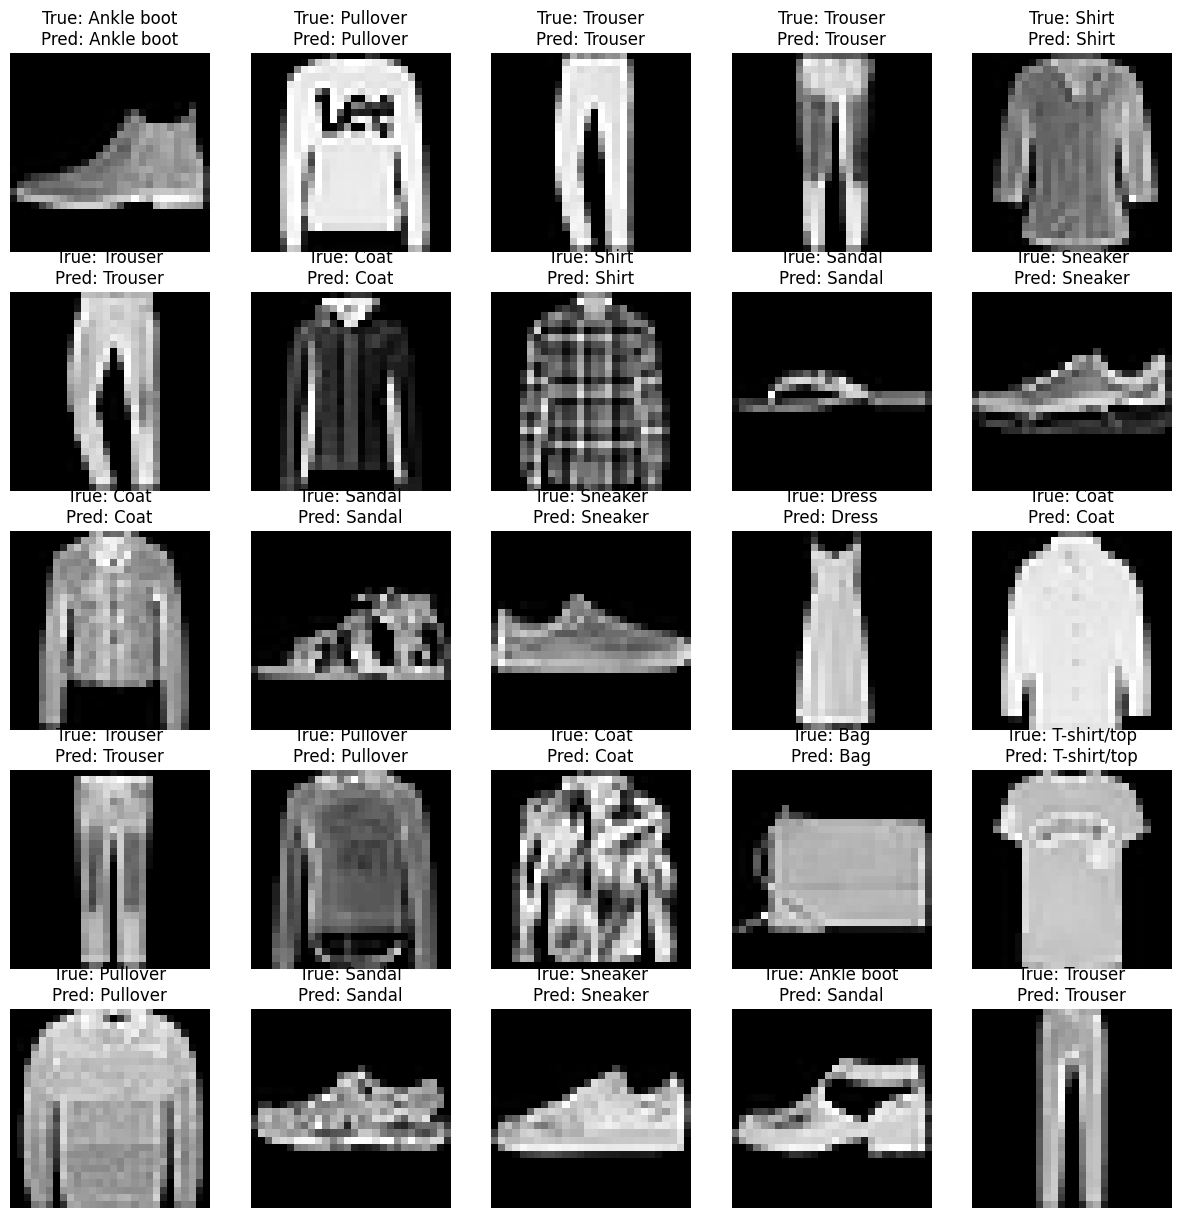

In [ ]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i].squeeze(), cmap="gray")
    plt.title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[predicted_labels[i]]}")
    plt.axis("off")
plt.show()

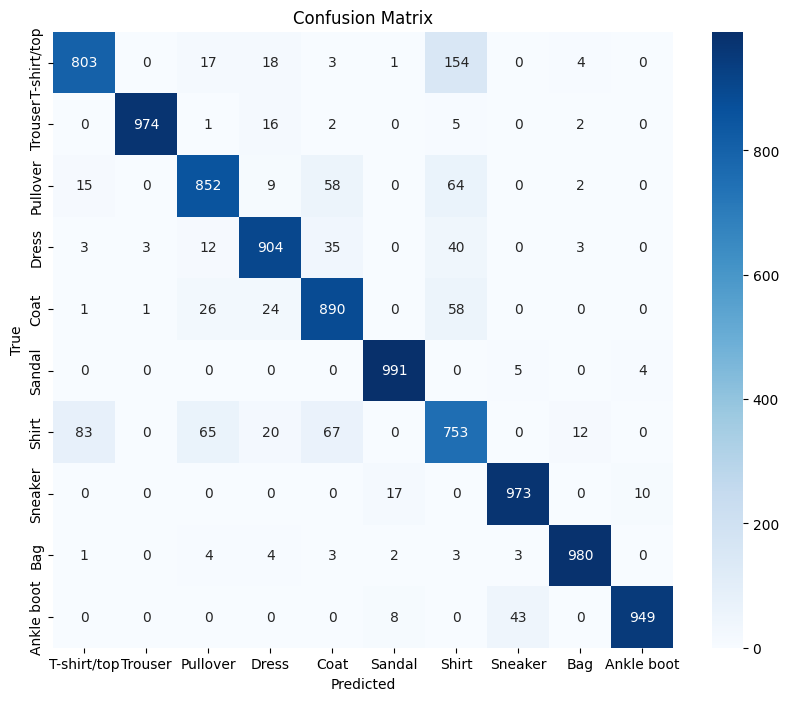

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(true_labels, predicted_labels, target_names=class_names)
print(report)

              precision    recall  f1-score   support

 T-shirt/top       0.89      0.80      0.84      1000
     Trouser       1.00      0.97      0.98      1000
    Pullover       0.87      0.85      0.86      1000
       Dress       0.91      0.90      0.91      1000
        Coat       0.84      0.89      0.86      1000
      Sandal       0.97      0.99      0.98      1000
       Shirt       0.70      0.75      0.73      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.99      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
model.save("fashion_mnist_model.keras")

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Download latest version
path = kagglehub.dataset_download("paramaggarwal/fashion-product-images-dataset")

print("Path to dataset files:", path)

100%|██████████| 23.1G/23.1G [09:46<00:00, 42.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-dataset/versions/1


In [ ]:
import glob

dataset_path = "/root/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-dataset/versions/1"
csv_files = glob.glob(f"{dataset_path}/**/styles.csv", recursive=True)

print(csv_files)

['/root/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-dataset/versions/1/fashion-dataset/styles.csv', '/root/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-dataset/versions/1/fashion-dataset/fashion-dataset/styles.csv']


In [ ]:
STYLES_CSV_PATH = "/root/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-dataset/versions/1/fashion-dataset/styles.csv"
IMAGES_PATH = "/root/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-dataset/versions/1/fashion-dataset/images/"


df = pd.read_csv(STYLES_CSV_PATH, on_bad_lines='skip')

print(df.shape)
df.head()

(44424, 10)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [ ]:
import os
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split

# Путь к папке с изображениями
image_dir = IMAGES_PATH

# Загрузка изображений и меток
images = []
labels = []

for index, row in df.iterrows():
    image_path = os.path.join(image_dir, f"{row['id']}.jpg")
    if os.path.exists(image_path):
        img = image.load_img(image_path, target_size=(28, 28), color_mode="grayscale")
        img_array = image.img_to_array(img) / 255.0  # Нормализация
        images.append(img_array)
        labels.append(row["masterCategory"])  # Используем основную категорию

# Преобразуем в numpy массивы
images = np.array(images)
labels = np.array(labels)

# Преобразуем метки в one-hot encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_one_hot = tf.keras.utils.to_categorical(labels_encoded)

# Разделение на тренировочный и тестовый наборы
x_train, x_test, y_train, y_test = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import load_model

# Загрузка предобученной модели
model = load_model("fashion_mnist_model.h5")

# Заменяем последний слой для нового количества классов
num_classes = len(label_encoder.classes_)
model.pop()  # Удаляем последний слой
model.add(layers.Dense(num_classes, activation="softmax"))  # Новый слой

# Замораживаем слои, чтобы не переобучать их
for layer in model.layers[:-1]:
    layer.trainable = False

# Компиляция модели
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 224,647 (877.53 KB)

 Trainable params: 903 (3.53 KB)

 Non-trainable params: 223,744 (874.00 KB)

In [ ]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=10,
    batch_size=64
)

Epoch 1/10
556/556 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.7700 - loss: 0.6032 - val_accuracy: 0.8245 - val_loss: 0.4873
Epoch 2/10
556/556 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.7749 - loss: 0.5926 - val_accuracy: 0.8256 - val_loss: 0.4858
Epoch 3/10
556/556 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.7722 - loss: 0.5991 - val_accuracy: 0.8234 - val_loss: 0.4828
Epoch 4/10
556/556 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.7760 - loss: 0.5876 - val_accuracy: 0.8209 - val_loss: 0.4842
Epoch 5/10
556/556 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.7771 - loss: 0.5863 - val_accuracy: 0.8188 - val_loss: 0.4817
Epoch 6/10
556/556 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.7730 - loss: 0.6000 - val_accuracy: 0.8229 - val_loss: 0.4819
Epoch 7/10
556/556 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.7770 - loss: 0.5939 - val_accuracy: 0.8200 - val_loss: 0.4837
Epoch 8/10
556/556 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.7720 - loss: 0.5970 - 

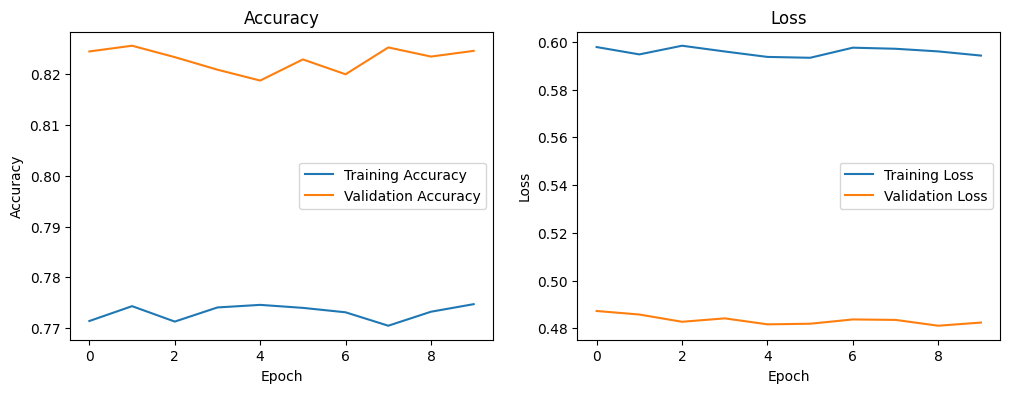

In [ ]:
plot_training_history(history)

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8288 - loss: 0.4786
Test Accuracy: 82.46%
Test Loss: 0.4824


In [ ]:
# Разморозка части слоёв
for layer in model.layers[-50:]:
    layer.trainable = True

# Уменьшение learning rate для тонкой настройки
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 224,647 (877.53 KB)

 Trainable params: 224,647 (877.53 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras import callbacks

# Ранняя остановка
early_stopping = callbacks.EarlyStopping(
    monitor="val_loss",  # Мониторим потери на валидации
    patience=5,  # Останавливаем, если потери не улучшаются 5 эпох
    restore_best_weights=True  # Восстанавливаем лучшие веса
)

# Уменьшение learning rate
reduce_lr = callbacks.ReduceLROnPlateau(
    monitor="val_loss",  # Мониторим потери на валидации
    factor=0.2,  # Уменьшаем learning rate в 5 раз
    patience=3,  # Ждём 3 эпохи без улучшений
    min_lr=1e-7  # Минимальный learning rate
)

In [ ]:
history_fine_tune = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20,  # Увеличиваем количество эпох
    batch_size=64,
    callbacks=[early_stopping, reduce_lr]  # Добавляем callback'и
)

Epoch 1/20
556/556 ━━━━━━━━━━━━━━━━━━━━ 34s 58ms/step - accuracy: 0.7768 - loss: 0.5848 - val_accuracy: 0.8422 - val_loss: 0.4334 - learning_rate: 1.0000e-05
Epoch 2/20
556/556 ━━━━━━━━━━━━━━━━━━━━ 32s 58ms/step - accuracy: 0.8090 - loss: 0.5198 - val_accuracy: 0.8548 - val_loss: 0.4040 - learning_rate: 1.0000e-05
Epoch 3/20
556/556 ━━━━━━━━━━━━━━━━━━━━ 31s 56ms/step - accuracy: 0.8159 - loss: 0.4961 - val_accuracy: 0.8624 - val_loss: 0.3812 - learning_rate: 1.0000e-05
Epoch 4/20
556/556 ━━━━━━━━━━━━━━━━━━━━ 32s 57ms/step - accuracy: 0.8250 - loss: 0.4729 - val_accuracy: 0.8718 - val_loss: 0.3628 - learning_rate: 1.0000e-05
Epoch 5/20
556/556 ━━━━━━━━━━━━━━━━━━━━ 46s 67ms/step - accuracy: 0.8382 - loss: 0.4412 - val_accuracy: 0.8782 - val_loss: 0.3478 - learning_rate: 1.0000e-05
Epoch 6/20
556/556 ━━━━━━━━━━━━━━━━━━━━ 39s 64ms/step - accuracy: 0.8414 - loss: 0.4366 - val_accuracy: 0.8846 - val_loss: 0.3343 - learning_rate: 1.0000e-05
Epoch 7/20
547/556 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

In [1]:
plot_training_history(history_fine_tune)

NameError: name 'plot_training_history' is not defined